In [59]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
x = np.linspace(-10, 10, 50)
y1 = x 
y2 = x ** 2
y3 = x ** 3
y4 = np.sqrt(x[25:])

* `fig` (Figure):  Es el "lienzo" o "ventana" principal donde se dibujan los gráficos. actúa como el contenedor de más alto nivel que puede incluir uno o más subgráficos.


* `ax` (Axes): Son los subgráficos individuales dentro de la figura.  Representan un sistema de coordenadas donde puedes trazar datos, agregar etiquetas, títulos, leyendas, etc. `plt.subplots()` generara un solo subgrafico, para generar por ejemplo subsgráficos 2x2 : `plt.subsplots(2, 2)` 

```python

        fig, ax = plt.subplots (narrow, ncolumn, figsize=(height, widght))
        ax,[narrow, ncolumn] = plt.plot(x, y)
        
```

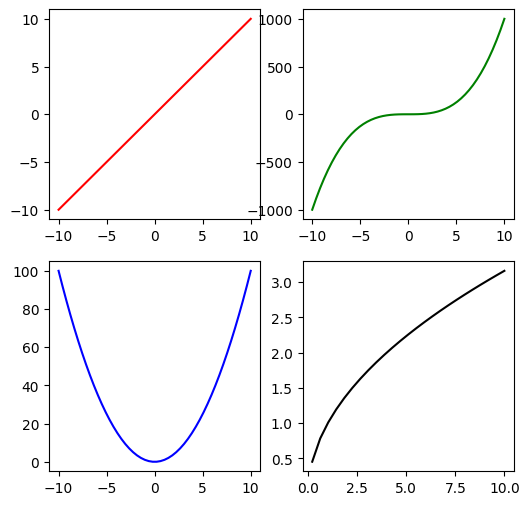

In [61]:
fig, ax = plt.subplots(2, 2, figsize=(6, 6))

ax[0, 0].plot(x, y1, 'r') #row=0, col=0
ax[1, 0].plot(x, y2, 'b') #row=1, col=0
ax[0, 1].plot(x, y3, 'g') #row=0, col=1
ax[1, 1].plot(x[25:], y4, 'k') #row=1, col=1

plt.show()

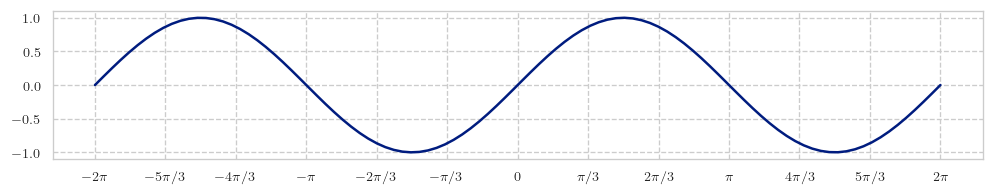

In [4]:
"""
An example of an attempt to get non-standard ticks in matplotlib plot.
Here, we use π/3 as unit length.
"""
import numpy as np
from fractions import Fraction as frac

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator

# to set nicer colors
import seaborn as sb
sb.set_style('whitegrid', {'grid.linestyle': '--'})
sb.set_palette("dark")

# better resolution & TeX support 
dpi,fontsize = 120,8
plt.rc('text', usetex=True)
plt.rc('savefig', dpi=dpi)
plt.rc('figure', dpi=dpi)
plt.rc('font', size=fontsize)

def pi_axis_formatter(val, pos, denomlim=10, pi=r'\pi'):
    """
    format label properly
    for example: 0.6666 pi --> 2π/3
               : 0      pi --> 0
               : 0.50   pi --> π/2  
    """
    minus = "-" if val < 0 else ""
    val = abs(val)
    ratio = frac(val/np.pi).limit_denominator(denomlim)
    n, d = ratio.numerator, ratio.denominator
    
    fmt2 = "%s" % d 
    if n == 0:
        fmt1 = "0"
    elif n == 1:
        fmt1 = pi
    else:
        fmt1 = r"%s%s" % (n,pi)
        
    fmtstring = "$" + minus + (fmt1 if d == 1 else r"{%s}/{%s}" % (fmt1, fmt2)) + "$"
    
    return fmtstring

plt.figure(figsize=(10,3))
ax = plt.gca()
ax.set_aspect('equal')

# an example of plot that benefits from non-standard ticks
xx = np.linspace(-2*np.pi, 2*np.pi,100)
ax.plot(xx, np.sin(xx))

ticklen = np.pi/3

# setting ticks labels
ax.xaxis.set_major_formatter(FuncFormatter(pi_axis_formatter))
# setting ticks at proper numbers
ax.xaxis.set_major_locator(MultipleLocator(base=ticklen))

plt.grid(True)
plt.show()